In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [ ]:
class TwoLayerNN:
    
    def __init__(self,trainData,trainLabels,numNeuronsHidden=20):
        if (trainData.shape[0] != trainLabels.shape[0]):
            raise ValueError('Dimensions of input Data and Labels do not match')
        #trainData is of size numData x dim
        self.__trainData=trainData
        #trainLabels is of size numData
        self.__trainLabels=trainLabels
        self.__weights1 = np.random.uniform(-1,1,(trainData.shape[1],numNeuronsHidden))
        self.__weights2 = np.random.uniform(-1,1,(1,numNeuronsHidden))
        self.__bias1 = np.random.uniform(-1,1,(numNeuronsHidden,1))
        self.__bias2 = np.random.uniform(-1,1)
                
    def __singleCosts(self,fx,y):
        # Implements Least Squares Loss
        return 0.5 * (fx - y)**2
    
    def __singleCostsDeriv(self,fx,y):
        return fx - y
    
    def __activation(self,x):
        # ReLU activation
        return np.where(x > 0, x, 0)
        
    def __activationDeriv(self,x):
        return np.where(x > 0, 1, 0)
    
    def __feedForward(self,x):
        # Please assure that x is a column vector OR a matrix of size dim x miniBatch
        if (x.shape[0] != trainData.shape[1]):
            raise ValueError('Dimensions do not match in feedForward')
        
        #net1 is a column vector or a numNeuronsHidden x miniBatch matrix!
        net1 = np.dot(np.transpose(self.__weights1),x) + self.__bias1
        #o1 is a column vector (or a numNeuronsHidden x miniBatch matrix)!
        o1 = self.__activation(net1)
        # No activation on the final layer, i.e. net2 = o2
        #o2 is a number or a miniBatch size row vector!
        o2 = np.dot(self.__weights2,o1) + self.__bias2
        return net1, o1, o2
    
    def __backProp(self,x,y,net1,o1,o2):
        # Please assure that x is a column vector OR a matrix of size dim x miniBatch
        if (x.shape[0] != trainData.shape[1]):
            raise ValueError('Dimensions do not match in backProp')
            
        miniBatchSize = x.shape[1]
        # delta2 is a number or a miniBatch size row vector
        delta2 = self.__singleCostsDeriv(o2,y)
        # delta1 is a miniBatch x numNeuronsHidden matrix
        delta1 = np.dot(np.transpose(delta2), self.__weights2)
        
        tmp = np.multiply(delta1,np.transpose(self.__activationDeriv(net1)))
        #derivW1 is a dim x numNeuronsHidden matrix of averaged gradients for __weights1 for the actucal miniBatch
        derivW1 = np.dot(x,tmp)/miniBatchSize
        #derivW2 is a 1 x numNeuronsHidden rowVector of averaged gradients for __weights2 for the actual miniBatch
        derivW2 = np.dot(delta2,np.transpose(o1))/miniBatchSize
        #derivB1 is a numNeuronsHidden x 1 columnVector of averaged gradients for __bias1 for the actual miniBatch
        derivB1 = np.sum(np.transpose(tmp),axis=1,keepdims=True)/miniBatchSize
        # derivB2 is a number containing the averaged gradients for __bias2 for the actual miniBatch
        derivB2 = np.sum(delta2)/miniBatchSize
        
        return derivW1, derivW2, derivB1, derivB2
    
    def __randomMiniBatch(self,miniBatchSize=10):
        miniBatchSize = min(miniBatchSize,self.__trainData.shape[0])
        mask = np.random.choice(a=self.__trainData.shape[0],size=miniBatchSize,replace=False)
        return trainData[mask,:], trainLabels[mask]
    
    def __stepSGD(self,miniBatchSize=10,learningRate=0.001):
        #Draw random miniBatch
        x, y = self.__randomMiniBatch(miniBatchSize=miniBatchSize)
        #Fit sizes to internal convention
        x = np.transpose(x)
        y = np.reshape(y, (1,-1))
        
        #Feed Forward
        net1, o1, o2 = self.__feedForward(x=x)
        #Backprop
        derivW1, derivW2, derivB1, derivB2 = self.__backProp(x=x,y=y,net1=net1,o1=o1,o2=o2)
        
        #Update weights
        self.__weights1 -= learningRate * derivW1
        self.__weights2 -= learningRate * derivW2
        self.__bias1 -= learningRate * derivB1
        self.__bias2 -= learningRate * derivB2
        
    def evalData(self,x,y=None):
        #x has to be of size numData x dim
        if (x.shape[1] != trainData.shape[1]):
            raise ValueError('Dimensions do not match in evalData')
        if (y is not None):
            yRow = np.reshape(y,(1,-1))
            if (yRow.shape[1] != x.shape[0]):
                raise ValueError('Dimensions do not match in evalData')
                
        _,_,ret = self.__feedForward(np.transpose(x))
        
        lse = -1
        if (y is not None):
            lse = np.sum(self.__singleCosts(ret,yRow))/x.shape[0]
        return ret, lse
        
    def SGD(self,numSteps=1000,miniBatchSize=10,learningRate=0.001):
        for i in range(1,numSteps+1):
            self.__stepSGD(miniBatchSize=miniBatchSize,learningRate=learningRate)
            if (i % (numSteps/10) == 0):
                #Evaluate f(trainData)
                _,lse = self.evalData(x=self.__trainData,y=self.__trainLabels)
                print("SGD step %d of %d. Least-Squares Error on training data: %f" % (i,numSteps,lse))
                
    def updateTrainData(self,trainData,trainLabels):
        if ((trainData.shape[0] != trainLabels.shape[0]) or (trainData.shape[1] != self.__trainData.shape[1])):
            raise ValueError('Dimensions of input Data and Labels do not match')
        #trainData is of size numData x dim
        self.__trainData=trainData
        #trainLabels is of size numData
        self.__trainLabels=trainLabels

In [ ]:
#Some sanity checking
def drawCircleData(n=100):
    nhalf = int(n/2)

    train_a = np.array([]).reshape(0,2)
    train_b = np.array([]).reshape(0,2)

    while(train_a.shape[0] < nhalf):
        tmp = np.random.uniform(-1,1,(1,2))
        if np.linalg.norm(tmp) < 1:
            train_a = np.append(train_a,tmp,axis=0)
        
    while(train_b.shape[0] < nhalf):
        tmp = np.random.uniform(-2,2,(1,2))
        if (np.linalg.norm(tmp) < 2) and (np.linalg.norm(tmp) > 1):
            train_b = np.append(train_b,tmp,axis=0)

    trainData = np.append(train_a,train_b,axis=0)
    trainLabels = np.append(-1*np.ones(nhalf),np.ones(nhalf))

    return trainData, trainLabels

def PlotSeperatorNN(value,inputData,NN):
    #This plots the hyperplane alpha_0 + alpha_1 x_1 + ... + alpha_d x_d = value
    
    samplenum = 1000
    minx = np.amin(inputData[:,0])
    maxx = np.amax(inputData[:,0])
    miny = np.amin(inputData[:,1])
    maxy = np.amax(inputData[:,1])
    xrange = np.arange(minx-1, maxx+1, (maxx-minx+2)/samplenum)
    yrange = np.arange(miny-1, maxy+1, (maxy-miny+2)/samplenum)
    X, Y = np.meshgrid(xrange,yrange)
    inpArray = np.array([X.flatten(),Y.flatten()]).T
    Z,_ = NN.evalData(x=inpArray,y=None)
    Z = np.where(Z > value, 1, -1)
    Z = np.reshape(Z,X.shape)
    
    plt.xlim(minx - 1, maxx + 1)
    plt.ylim(miny - 1, maxy + 1)
    #plt.contour(X, Y, Z, alpha=0.2,linestyles='dashed',linewidths=2)
    plt.contourf(X, Y, Z, alpha=0.2)
    
trainData, trainLabels = drawCircleData(n=500)
NN = TwoLayerNN(trainData,trainLabels,numNeuronsHidden=20)

SGD step 5000 of 50000. Least-Squares Error on training data: 0.106746
SGD step 10000 of 50000. Least-Squares Error on training data: 0.101563
SGD step 15000 of 50000. Least-Squares Error on training data: 0.098397
SGD step 20000 of 50000. Least-Squares Error on training data: 0.093151
SGD step 25000 of 50000. Least-Squares Error on training data: 0.089256
SGD step 30000 of 50000. Least-Squares Error on training data: 0.086118
SGD step 35000 of 50000. Least-Squares Error on training data: 0.082853
SGD step 40000 of 50000. Least-Squares Error on training data: 0.078970
SGD step 45000 of 50000. Least-Squares Error on training data: 0.076266
SGD step 50000 of 50000. Least-Squares Error on training data: 0.076210


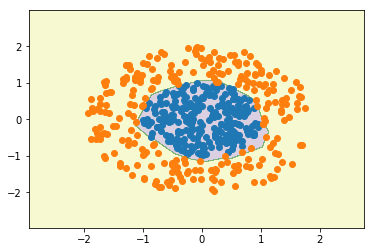

In [ ]:
# trainData, trainLabels = drawCircleData(n=1000)
# NN.updateTrainData(trainData,trainLabels)
NN.SGD(numSteps=50000,miniBatchSize=20,learningRate=0.01)
PlotSeperatorNN(value=0,inputData=trainData,NN=NN)
for c in np.unique(trainLabels):
    mask = trainLabels == c
    plt.scatter(trainData[mask,0], trainData[mask,1],label='Class ' + str(int(c)))
plt.show()

In [ ]:
import keras
import keras.layers as layers
from keras import backend as K

Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
img_rows, img_cols = 28, 28

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
Y_train = keras.utils.np_utils.to_categorical(y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(y_test, 10)

### MNIST classification for fully-connected network

In [ ]:
# Fully-connected, one hidden layer
model = keras.models.Sequential()
INPUT = (784,)
model.add(layers.Dense(128, input_shape=INPUT, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train.reshape((X_train.shape[0],) + INPUT), Y_train,
                    batch_size=128, epochs=20, verbose=True,
                    validation_data=(X_test.reshape((X_test.shape[0],) + INPUT), Y_test))
model.evaluate(X_test, Y_test, verbose=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/step - loss: 1.2875 - acc: 0.6712 - val_loss: 0.6079 - val_acc: 0.8516
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.5030 - acc: 0.8664 - val_loss: 0.4026 - val_acc: 0.8928
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step 

ValueError: Error when checking input: expected dense_23_input to have 2 dimensions, but got array with shape (10000, 28, 28, 1)

In [ ]:
def plot_history(history):
    x = range(history.params['epochs'])
    acc, val_acc = history.history['acc'], history.history['val_acc']
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].set_title('accuracy')
    axarr[0].plot(x, acc, label='train')
    axarr[0].plot(x, val_acc, label='validation')
    axarr[0].legend()
    
    loss, val_loss = history.history['loss'], history.history['val_loss']
    axarr[1].set_title('loss')
    axarr[1].plot(x, loss, label='train')
    axarr[1].plot(x, val_loss, label='validation')
    axarr[1].legend()

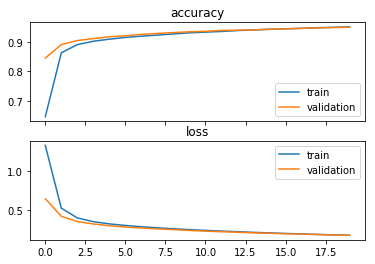

In [ ]:
plot_history(history)

In [ ]:
# Fully-connected, one hidden layer, with dropout (200 iterations)
model = keras.models.Sequential()
INPUT = (784,)
model.add(layers.Dense(128, input_shape=INPUT, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train.reshape((X_train.shape[0],) + INPUT), Y_train,
                    batch_size=128, epochs=250, verbose=True,
                    validation_data=(X_test.reshape((X_test.shape[0],) + INPUT), Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/250
60000/60000 [==============================] - 3s 47us/step - loss: 1

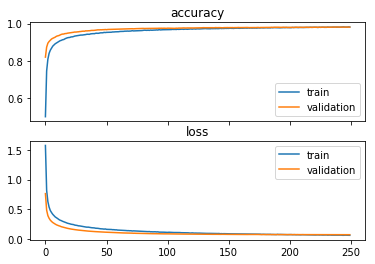

In [ ]:
plot_history(history)

In [ ]:
# Fully-connected, one hidden layer, with dropout, adam optimizer (20 iterations)
model = keras.models.Sequential()
INPUT = (784,)
model.add(layers.Dense(128, input_shape=INPUT, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train.reshape((X_train.shape[0],) + INPUT), Y_train,
                    batch_size=128, epochs=20, verbose=True,
                    validation_data=(X_test.reshape((X_test.shape[0],) + INPUT), Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.

In [ ]:
layers.MaxPooling2D?

In [ ]:
model = keras.models.Sequential()
model.add(layers.Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NB_EPOCH = 15
BATCH_SIZE = 128
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=True, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               589952    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

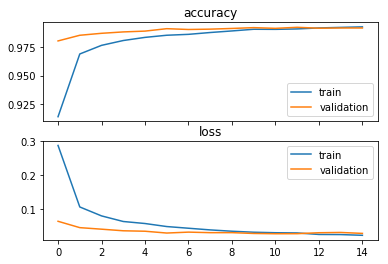

In [ ]:
plot_history(history)

In [ ]:
from sklearn.svm import LinearSVC
import scipy.io
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
ped_data = scipy.io.loadmat("data/pca_ped_25x50.mat")
ped_images = ped_data['ped_train_int_25x50'][:,1:]
garb_images = ped_data['garb_train_int_25x50'][:,1:]
ped_test_images = ped_data['ped_test_int_25x50'][:,1:]
garb_test_images = ped_data['garb_test_int_25x50'][:,1:]
del ped_data


min_max = MinMaxScaler()
min_max.fit(np.vstack((ped_images, garb_images)))

ped_images = min_max.transform(ped_images)
garb_images = min_max.transform(garb_images)
y_train = np.concatenate((np.ones(len(ped_images)), np.zeros(len(garb_images))))

ped_test_images = min_max.transform(ped_test_images)
garb_test_images = min_max.transform(garb_test_images)
y_test = np.concatenate((np.ones(len(ped_test_images)), np.zeros(len(garb_test_images))))

In [ ]:
img_rows, img_cols = 25, 50
X_train = np.vstack((ped_images, garb_images)).astype('float32')
X_test = np.vstack((ped_test_images, garb_test_images)).astype('float32')
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
ped_model = keras.models.Sequential()
ped_model.add(layers.Conv2D(2, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
ped_model.add(layers.Conv2D(4, (3, 3), activation='relu'))
ped_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
ped_model.add(layers.Dropout(0.25))
ped_model.add(layers.Flatten())
ped_model.add(layers.Dense(128, activation='relu'))
ped_model.add(layers.Dropout(0.5))
ped_model.add(layers.Dense(2, activation='softmax'))
print(ped_model.summary())

Y_train = keras.utils.np_utils.to_categorical(y_train,2)
Y_test = keras.utils.np_utils.to_categorical(y_test, 2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 23, 48, 2)         20        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 21, 46, 4)         76        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 23, 4)         0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 10, 23, 4)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 920)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               117888    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
__________

In [ ]:
ped_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NB_EPOCH = 20
BATCH_SIZE = 128
history = ped_model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=True, validation_data=(X_test, Y_test))

Train on 3000 samples, validate on 1000 samples
Epoch 1/20
3000/3000 [==============================] - 2s 732us/step - loss: 0.1678 - acc: 0.9360 - val_loss: 0.3919 - val_acc: 0.8560
Epoch 2/20
3000/3000 [==============================] - 1s 388us/step - loss: 0.1536 - acc: 0.9430 - val_loss: 0.4022 - val_acc: 0.8550
Epoch 3/20
3000/3000 [==============================] - 1s 408us/step - loss: 0.1578 - acc: 0.9423 - val_loss: 0.4080 - val_acc: 0.8480
Epoch 4/20
3000/3000 [==============================] - 1s 406us/step - loss: 0.1626 - acc: 0.9370 - val_loss: 0.3863 - val_acc: 0.8520
Epoch 5/20
3000/3000 [==============================] - 1s 402us/step - loss: 0.1501 - acc: 0.9437 - val_loss: 0.4035 - val_acc: 0.8450
Epoch 6/20
3000/3000 [==============================] - 2s 525us/step - loss: 0.1460 - acc: 0.9470 - val_loss: 0.4050 - val_acc: 0.8530
Epoch 7/20
3000/3000 [==============================] - 1s 381us/step - loss: 0.1352 - acc: 0.9533 - val_loss: 0.4177 - val_acc: 0.8570


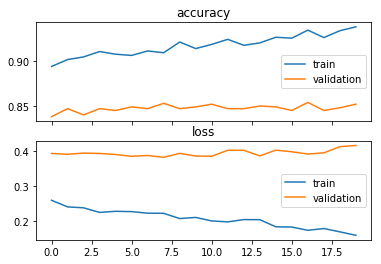

In [ ]:
plot_history(history)

In [ ]:
cnn_features = keras.models.Model(
    inputs=ped_model.input,
    outputs=ped_model.get_layer('flatten_12').output)

In [ ]:
X_train_cnn = cnn_features.predict(X_train)
X_test_cnn = cnn_features.predict(X_test)

In [ ]:
import hog
hog_train = []
for i in range(X_train.shape[0]):
    hog_train.append(hog.extract(X_train[i].reshape(img_rows, img_cols), 10, 5))
hog_test = []
for i in range(X_test.shape[0]):
    hog_test.append(hog.extract(X_test[i].reshape(img_rows, img_cols), 10, 5))

hog_train = np.array(hog_train)
hog_test = np.array(hog_test)

In [ ]:
print("Train HoG PCA")
pca = PCA()
pca.fit(hog_train)

print("Train CNN PCA")
pca_cnn = PCA()
pca_cnn.fit(X_train_cnn)

(3000, 920)

In [ ]:
qs = list(range(190, 210 + 1, 1))
tr_sc = []
te_sc = []
print(qs[-1])
for q in qs:
    hog_train_pca = pca.transform(hog_train)[:,:68]
    hog_test_pca = pca.transform(hog_test)[:,:68]
    
    cnn_train_pca = pca_cnn.transform(X_train_cnn)[:,:q]
    cnn_test_pca = pca_cnn.transform(X_test_cnn)[:,:q]
    X_train_cnn_hog = np.hstack((cnn_train_pca, hog_train_pca))
#     X_train_cnn_hog = np.hstack((hog_train_pca,))
    X_test_cnn_hog = np.hstack((cnn_test_pca, hog_test_pca))
#     X_test_cnn_hog = np.hstack((hog_test_pca,))
    svm_ped = LinearSVC(C=0.8)
    svm_ped.fit(X_train_cnn_hog, y_train)
    tr, te = svm_ped.score(X_train_cnn_hog, y_train), svm_ped.score(X_test_cnn_hog, y_test)
    tr_sc.append(tr)
    te_sc.append(te)
    print(q, end=' ')

210
190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 

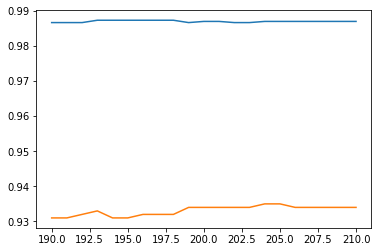

In [ ]:
plt.plot(qs, tr_sc)
plt.plot(qs, te_sc)

In [ ]:
qs[np.argmax(te_sc)]

204

In [ ]:
q_cnn = 204
q_hog = 68
C = 0.8
best = 0
p = None
for C in np.arange(0.7, .9, 0.025):
#     for q in range(60, 75):
    hog_train_pca = pca.transform(hog_train)[:,:q_hog]
    hog_test_pca = pca.transform(hog_test)[:,:q_hog]
    X_train_cnn_hog = np.hstack((pca_cnn.transform(X_train_cnn)[:,:q_cnn], hog_train_pca))
    X_test_cnn_hog = np.hstack((pca_cnn.transform(X_test_cnn)[:,:q_cnn], hog_test_pca))

    svm_ped = LinearSVC(C=C)
    svm_ped.fit(X_train_cnn_hog, y_train)
    tr, te = svm_ped.score(X_train_cnn_hog, y_train), svm_ped.score(X_test_cnn_hog, y_test)
    if te >= best:
        p = (q, C)
        best = te
        print(te, p)
tr, te

0.934 (210, 0.7)
0.935 (210, 0.725)
0.935 (210, 0.75)
0.935 (210, 0.775)
0.935 (210, 0.8)


(0.9876666666666667, 0.933)

In [ ]:
errors = np.where(svm_ped.predict(X_test_cnn_hog) != y_test)[0]
print(len(errors), "errors made")

67 errors made


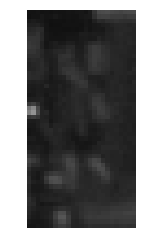

In [ ]:
plot_im(plt.gca(), X_test[errors[-50]].reshape(img_rows, img_cols).T, contrast=False)

In [ ]:
X_test_cnn_hog.shape

(1000, 272)